In [2]:
import tensorflow.keras as tf
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data(
    num_words=10000)


17464789/17464789 [==============================] - 1s 0us/step


***To retrain the model, I've chosen three epochs in this instance***

In [3]:

train_data[0]

[1,
 14,
 22,
 16,
 43,
 530,
 973,
 1622,
 1385,
 65,
 458,
 4468,
 66,
 3941,
 4,
 173,
 36,
 256,
 5,
 25,
 100,
 43,
 838,
 112,
 50,
 670,
 2,
 9,
 35,
 480,
 284,
 5,
 150,
 4,
 172,
 112,
 167,
 2,
 336,
 385,
 39,
 4,
 172,
 4536,
 1111,
 17,
 546,
 38,
 13,
 447,
 4,
 192,
 50,
 16,
 6,
 147,
 2025,
 19,
 14,
 22,
 4,
 1920,
 4613,
 469,
 4,
 22,
 71,
 87,
 12,
 16,
 43,
 530,
 38,
 76,
 15,
 13,
 1247,
 4,
 22,
 17,
 515,
 17,
 12,
 16,
 626,
 18,
 2,
 5,
 62,
 386,
 12,
 8,
 316,
 8,
 106,
 5,
 4,
 2223,
 5244,
 16,
 480,
 66,
 3785,
 33,
 4,
 130,
 12,
 16,
 38,
 619,
 5,
 25,
 124,
 51,
 36,
 135,
 48,
 25,
 1415,
 33,
 6,
 22,
 12,
 215,
 28,
 77,
 52,
 5,
 14,
 407,
 16,
 82,
 2,
 8,
 4,
 107,
 117,
 5952,
 15,
 256,
 4,
 2,
 7,
 3766,
 5,
 723,
 36,
 71,
 43,
 530,
 476,
 26,
 400,
 317,
 46,
 7,
 4,
 2,
 1029,
 13,
 104,
 88,
 4,
 381,
 15,
 297,
 98,
 32,
 2071,
 56,
 26,
 141,
 6,
 194,
 7486,
 18,
 4,
 226,
 22,
 21,
 134,
 476,
 26,
 480,
 5,
 144,
 30,
 5535,
 18,

***Checking the Data***

In [4]:
train_labels[0]

max([max(sequence) for sequence in train_data])

9999

In [5]:
word_index = imdb.get_word_index()
reverse_word_index = dict(
    [(value, key) for (key, value) in word_index.items()])
decoded_review = " ".join(
    [reverse_word_index.get(i - 3, "?") for i in train_data[0]])

1641221/1641221 [==============================] - 0s 0us/step


***Preparing the Data***

***Utilizing the multi hot encoding to encode the integer sequences***

In [6]:
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        for j in sequence:
            results[i, j] = 1.
    return results
x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)


In [7]:
x_train[0]

y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

***Building the Model***

***Definition of the Model***

In [8]:
from tensorflow import keras
from tensorflow.keras import layers
# # In this case, I'm using two hidden layers, each with sixteen nodes, and one output layer node for either a +ve or -ve output. Hidden is handled by ReLu.
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])


***Compiling the model***

***The Loss function is the binary crossentropy and the Adam serves as the optimizer***

In [9]:
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])


***Verifying the approach***

***Considering a validation set aside***

In [10]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

***Training the Model***

***We are using 512 batches and 20 epochs to train the model***

In [11]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20


30/30 [==============================] - 2s 33ms/step - loss: 0.5506 - accuracy: 0.7566 - val_loss: 0.3902 - val_accuracy: 0.8599
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2939 - accuracy: 0.9015 - val_loss: 0.2930 - val_accuracy: 0.8854
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1990 - accuracy: 0.9345 - val_loss: 0.2799 - val_accuracy: 0.8904
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1488 - accuracy: 0.9542 - val_loss: 0.2819 - val_accuracy: 0.8861
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1143 - accuracy: 0.9675 - val_loss: 0.2965 - val_accuracy: 0.8823
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0891 - accuracy: 0.9780 - val_loss: 0.3150 - val_accuracy: 0.8807
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0698 - accuracy: 0.9855 - val_loss: 0.3410 - val_accuracy: 0.8787
Epoch 8/20
30/30

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

***Plotting the training and the validation loss***

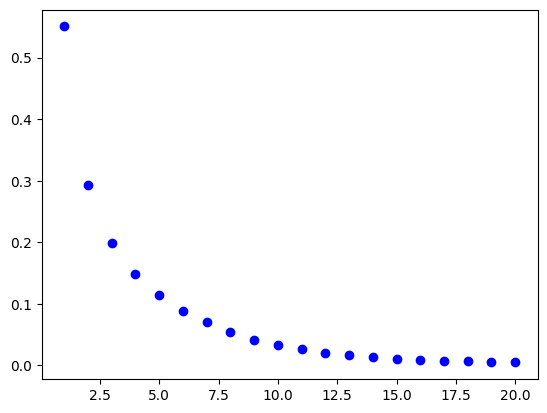

In [12]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")


***Plotting the training and the validation accuracy***

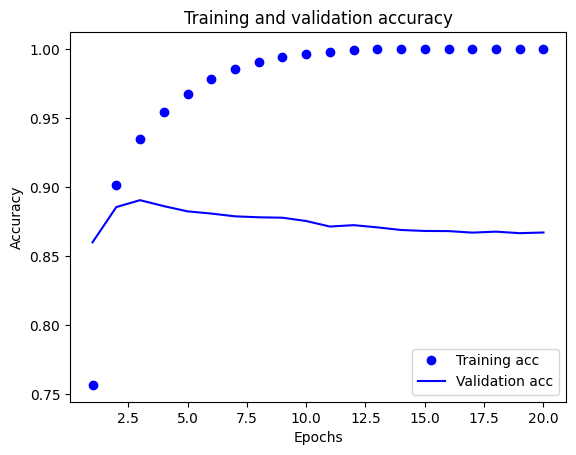

In [13]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

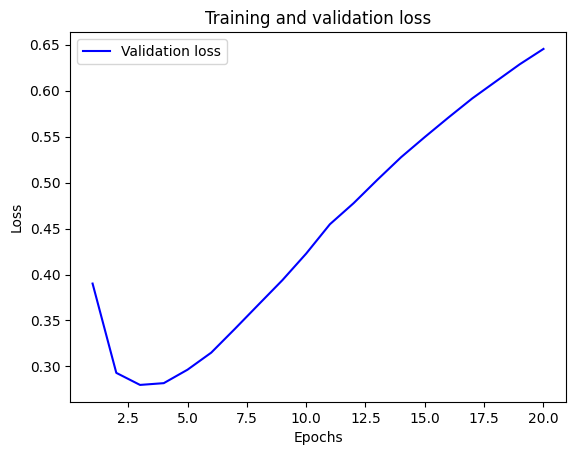

In [14]:
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

***Retraining the model from the beginning***

In [15]:
model = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])
#To retrain the model, I've chosen three epochs in this instance.
model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])
model.fit(x_train, y_train, epochs=4, batch_size=512)
results = model.evaluate(x_test, y_test)

results

Epoch 1/4
49/49 [==============================] - 1s 7ms/step - loss: 0.4462 - accuracy: 0.8172
Epoch 2/4
49/49 [==============================] - 0s 6ms/step - loss: 0.2246 - accuracy: 0.9191
Epoch 3/4
49/49 [==============================] - 0s 5ms/step - loss: 0.1687 - accuracy: 0.9407
Epoch 4/4
782/782 [==============================] - 1s 2ms/step - loss: 0.3264 - accuracy: 0.8776


[0.32635897397994995, 0.877560019493103]

***Constructing the Model***

1 utilizing two or three hidden layers and observe how it affects the validation and test accuracy

In [16]:
model1_1 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [17]:
model1_3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

In [18]:
model1_1.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model1_3.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

***Model fitting with 20 epochs and 512 batch size***

In [19]:
history1_1 = model1_1.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history1_3 = model1_3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))


Epoch 1/20
30/30 [==============================] - 1s 24ms/step - loss: 0.5275 - accuracy: 0.7851 - val_loss: 0.3968 - val_accuracy: 0.8628
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3163 - accuracy: 0.8991 - val_loss: 0.3196 - val_accuracy: 0.8842
Epoch 3/20
30/30 [==============================] - 0s 8ms/step - loss: 0.2432 - accuracy: 0.9241 - val_loss: 0.2915 - val_accuracy: 0.8892
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1993 - accuracy: 0.9396 - val_loss: 0.2823 - val_accuracy: 0.8905
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1682 - accuracy: 0.9516 - val_loss: 0.2778 - val_accuracy: 0.8891
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1441 - accuracy: 0.9597 - val_loss: 0.2800 - val_accuracy: 0.8880
Epoch 7/20
30/30 [==============================] - 0s 8ms/step - loss: 0.1250 - accuracy: 0.9672 - val_loss: 0.2847 - val_accuracy: 0.8852
Epoch 8/20
30/30 [=

***Plotting the training Vs validation data***

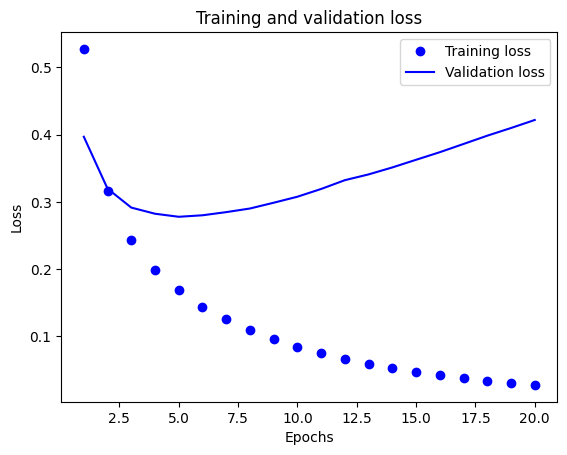

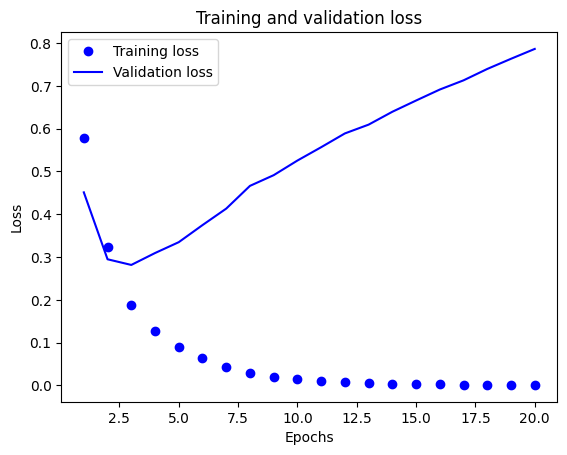

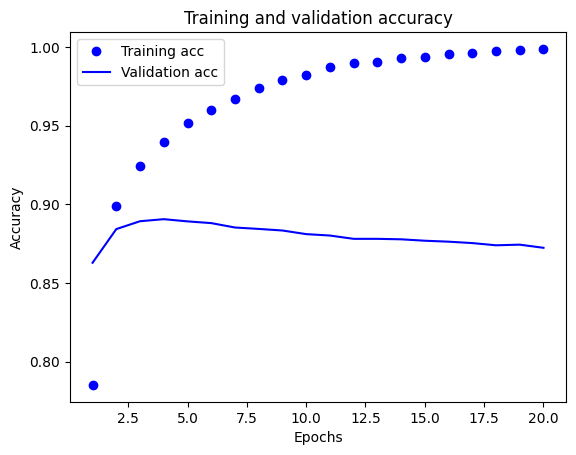

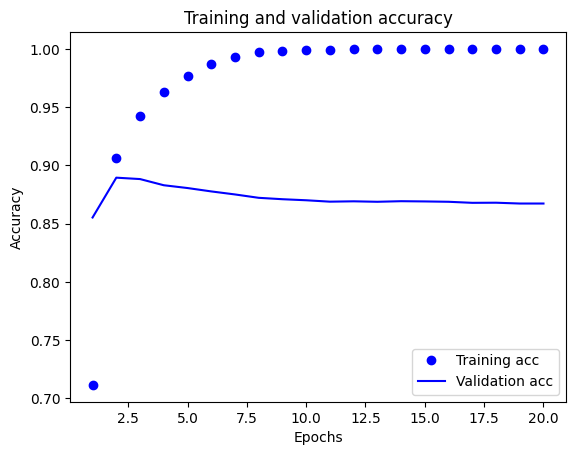

In [20]:

historyp1_1 = history1_1.history
historyp1_1.keys()

historyp1_3 = history1_1.history
historyp1_3.keys()

historyp1_1 = history1_1.history
loss_values1 = historyp1_1["loss"]
val_loss_values1 = historyp1_1["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values1, "bo", label="Training loss")
plt.plot(epochs, val_loss_values1, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

historyp1_3 = history1_3.history
loss_values3 = historyp1_3["loss"]
val_loss_values3 = historyp1_3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values3, "bo", label="Training loss")
plt.plot(epochs, val_loss_values3, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc1 = historyp1_1["accuracy"]
val_acc1 = historyp1_1["val_accuracy"]
plt.plot(epochs, acc1, "bo", label="Training acc")
plt.plot(epochs, val_acc1, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

plt.clf()
acc3 = historyp1_3["accuracy"]
val_acc3 = historyp1_3["val_accuracy"]
plt.plot(epochs, acc3, "bo", label="Training acc")
plt.plot(epochs, val_acc3, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***2 for the hidden layers iam using 32 node units and 64 units***

Epoch 1/20
30/30 [==============================] - 2s 32ms/step - loss: 0.5163 - accuracy: 0.7808 - val_loss: 0.3378 - val_accuracy: 0.8725
Epoch 2/20
30/30 [==============================] - 0s 13ms/step - loss: 0.2378 - accuracy: 0.9137 - val_loss: 0.2776 - val_accuracy: 0.8903
Epoch 3/20
30/30 [==============================] - 0s 14ms/step - loss: 0.1462 - accuracy: 0.9497 - val_loss: 0.2945 - val_accuracy: 0.8852
Epoch 4/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0970 - accuracy: 0.9711 - val_loss: 0.3337 - val_accuracy: 0.8792
Epoch 5/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0638 - accuracy: 0.9827 - val_loss: 0.3979 - val_accuracy: 0.8713
Epoch 6/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0426 - accuracy: 0.9907 - val_loss: 0.4329 - val_accuracy: 0.8757
Epoch 7/20
30/30 [==============================] - 0s 13ms/step - loss: 0.0251 - accuracy: 0.9961 - val_loss: 0.4818 - val_accuracy: 0.8719
Epoch 8/20
30

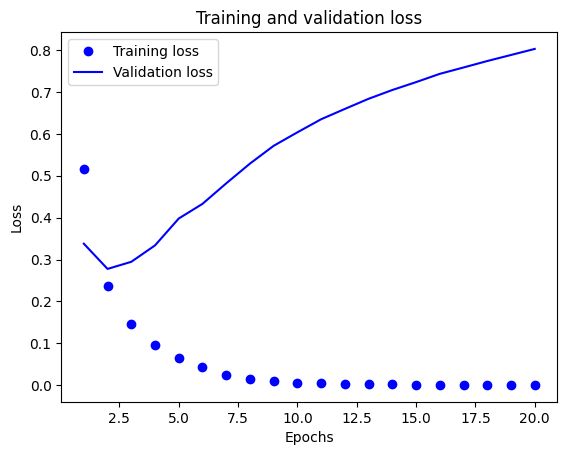

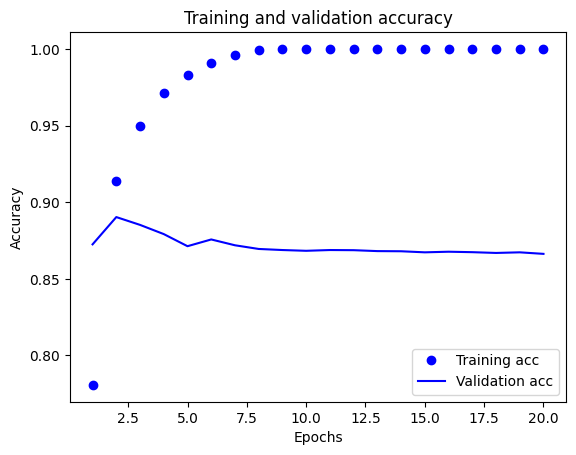

In [21]:
model2 = keras.Sequential([
    layers.Dense(32, activation="relu"),
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model2.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

hist2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

histp2 = hist2.history
loss_values = histp2["loss"]
val_loss_values = histp2["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp2["accuracy"]
val_acc = histp2["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***3 using the MSE loss function instead of the binary_crossentropy***

In [22]:
model3 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

Epoch 1/20
30/30 [==============================] - 1s 30ms/step - loss: 0.1745 - accuracy: 0.7901 - val_loss: 0.1152 - val_accuracy: 0.8663
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0836 - accuracy: 0.9057 - val_loss: 0.0886 - val_accuracy: 0.8872
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0549 - accuracy: 0.9371 - val_loss: 0.0833 - val_accuracy: 0.8881
Epoch 4/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0392 - accuracy: 0.9597 - val_loss: 0.0843 - val_accuracy: 0.8849
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0298 - accuracy: 0.9735 - val_loss: 0.0862 - val_accuracy: 0.8810
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0226 - accuracy: 0.9815 - val_loss: 0.0880 - val_accuracy: 0.8812
Epoch 7/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0168 - accuracy: 0.9882 - val_loss: 0.0910 - val_accuracy: 0.8779
Epoch 8/20
30/30 [

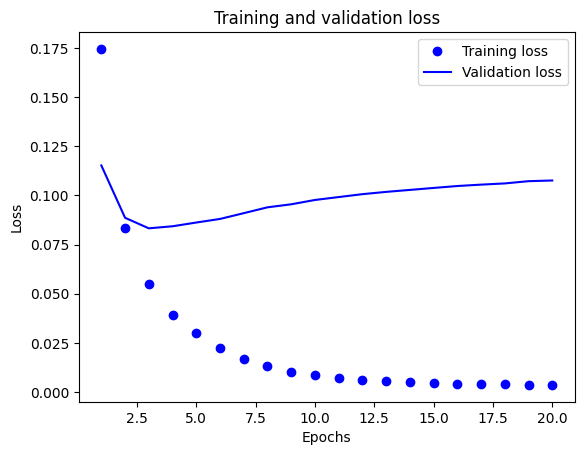

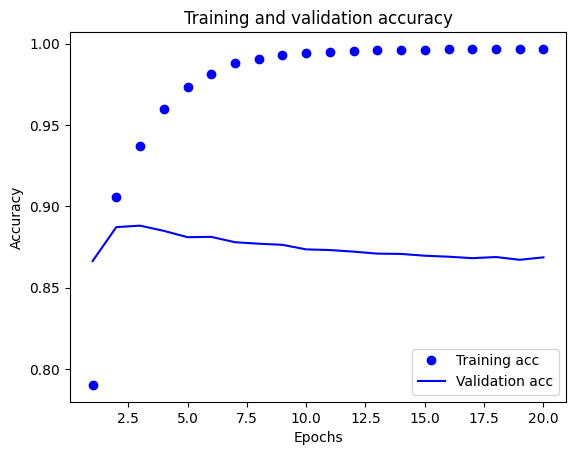

In [23]:
model3.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

hist3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

histp3 = hist3.history
loss_values = histp3["loss"]
val_loss_values = histp3["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp3["accuracy"]
val_acc = histp3["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

***Using the tanh activation instead of relu***

Epoch 1/20
30/30 [==============================] - 1s 26ms/step - loss: 0.1708 - accuracy: 0.7863 - val_loss: 0.1150 - val_accuracy: 0.8641
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0797 - accuracy: 0.9085 - val_loss: 0.0867 - val_accuracy: 0.8888
Epoch 3/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0520 - accuracy: 0.9428 - val_loss: 0.0826 - val_accuracy: 0.8888
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0373 - accuracy: 0.9637 - val_loss: 0.0836 - val_accuracy: 0.8858
Epoch 5/20
30/30 [==============================] - 0s 10ms/step - loss: 0.0274 - accuracy: 0.9757 - val_loss: 0.0869 - val_accuracy: 0.8829
Epoch 6/20
30/30 [==============================] - 0s 8ms/step - loss: 0.0203 - accuracy: 0.9839 - val_loss: 0.0888 - val_accuracy: 0.8809
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.0154 - accuracy: 0.9887 - val_loss: 0.0925 - val_accuracy: 0.8782
Epoch 8/20
30/30 [

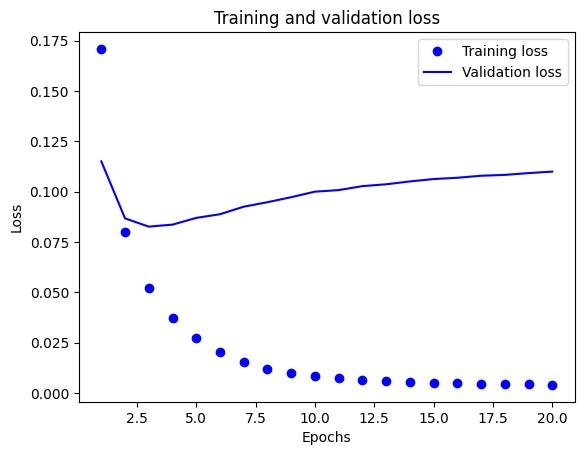

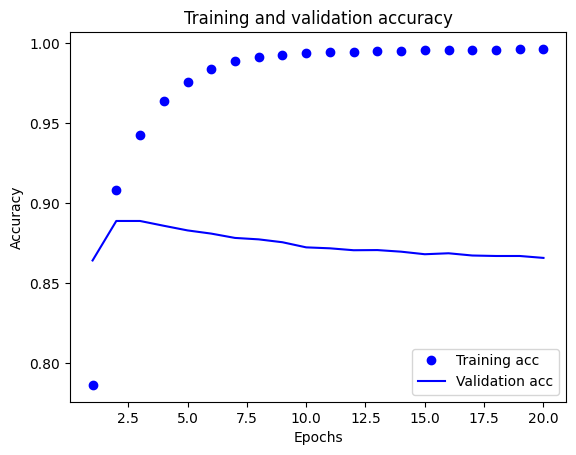

In [24]:
model4 = keras.Sequential([
    layers.Dense(16, activation="tanh"),
    layers.Dense(16, activation="tanh"),
    layers.Dense(1, activation="sigmoid")
])

model4.compile(optimizer="adam",
              loss="mse",
              metrics=["accuracy"])

hist4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

histp4 = hist4.history
loss_values = histp4["loss"]
val_loss_values = histp4["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp4["accuracy"]
val_acc = histp4["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

***5 In the network iam using dropout technique***

In [25]:
from tensorflow import keras
from tensorflow.keras import layers
model5 = keras.Sequential([
    layers.Dense(16, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(16, activation="relu"),
    layers.Dense(1, activation="sigmoid")
])

model5.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

hist5 = model5.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Epoch 1/20
30/30 [==============================] - 1s 25ms/step - loss: 0.6391 - accuracy: 0.6277 - val_loss: 0.5384 - val_accuracy: 0.8171
Epoch 2/20
30/30 [==============================] - 0s 9ms/step - loss: 0.4925 - accuracy: 0.8005 - val_loss: 0.4287 - val_accuracy: 0.8699
Epoch 3/20
30/30 [==============================] - 0s 10ms/step - loss: 0.3874 - accuracy: 0.8711 - val_loss: 0.3574 - val_accuracy: 0.8830
Epoch 4/20
30/30 [==============================] - 0s 9ms/step - loss: 0.3090 - accuracy: 0.8997 - val_loss: 0.3177 - val_accuracy: 0.8870
Epoch 5/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2530 - accuracy: 0.9242 - val_loss: 0.3108 - val_accuracy: 0.8873
Epoch 6/20
30/30 [==============================] - 0s 9ms/step - loss: 0.2167 - accuracy: 0.9375 - val_loss: 0.3097 - val_accuracy: 0.8871
Epoch 7/20
30/30 [==============================] - 0s 9ms/step - loss: 0.1865 - accuracy: 0.9483 - val_loss: 0.2987 - val_accuracy: 0.8858
Epoch 8/20
30/30 [

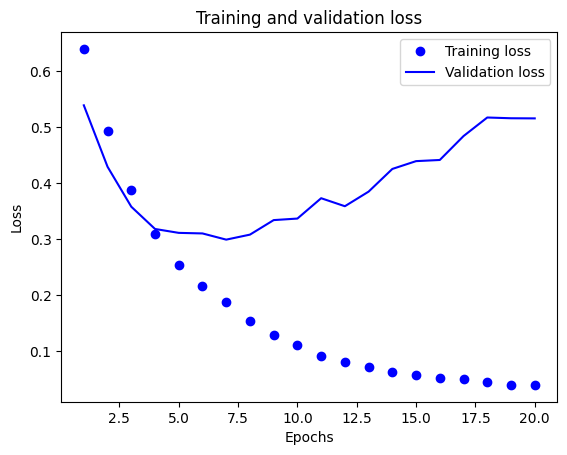

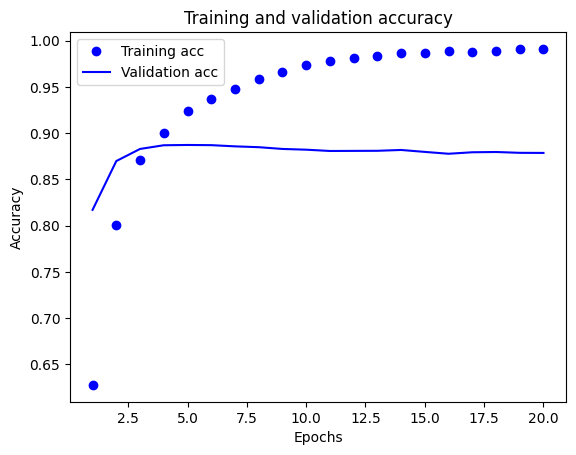

In [26]:
import matplotlib.pyplot as plt
histp5 = hist5.history
loss_values = histp5["loss"]
val_loss_values = histp5["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

plt.clf()
acc = histp5["accuracy"]
val_acc = histp5["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()